In [1]:
# useful starting line
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Load data

In [3]:
from leastSquares.helpers import load_data
from linearRegression_gradientDescent import costs as cts
# load dataset
x, y = load_data()
print("shape of x {v}".format(v=x.shape))
print("shape of y {v}".format(v=y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    D = tx.shape[1]
    ws = np.linalg.inv(tx.T @ tx + lambda_ * np.identity(D)) @ tx.T @ y
    loss = cts.ridge_mse(y, tx, ws, lambda_)
    return loss, ws

In [10]:
from splitData.split import split_data
from leastSquares.plots import plot_train_test
from leastSquares.build_polynomial import build_poly

def ridge_regression_demo(x, y, degree, ratio, seed, shuffle):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, num=15, endpoint=True, base=10.0)
    
    # split the data into training and testing
    data_train, data_test = split_data(x, y, ratio, seed, shuffle)

    # get features and targets
    x_train, y_train = data_train
    x_train = build_poly(x_train, degree) # feature augmentation
    
    x_test, y_test = data_test
    x_test = build_poly(x_test, degree)    

    rmse_train = []
    rmse_test  = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        loss, ws = ridge_regression(y_train, x_train, lambda_)
        
        rmse_train.append(loss)
        rmse_test.append(cts.ridge_mse(y_test, x_test, ws, lambda_))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_train[ind], te=rmse_test[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_train, rmse_test, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.058
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.027, Testing RMSE=0.059
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.031, Testing RMSE=0.062
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.038, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.046, Testing RMSE=0.074
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.051, Testing RMSE=0.077
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.048, Testing RMSE=0.074
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.042, Testing RMSE=0.068
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.037, Testing RMSE=0.065
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.038, Testing RMSE=0.066
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.046, Testing RMSE=0.074
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.064, Testing RMSE=0.092
proportion=0.5, degree=7, lambda=0.193, 

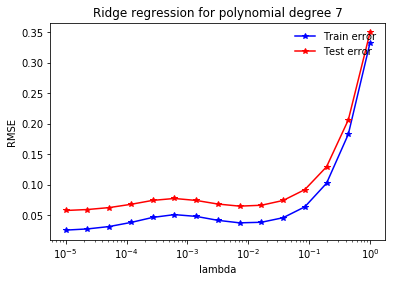

In [12]:
# define a few parameters
degree = 7
ratio  = .5
seed   = 1
shuffle = True

ridge_regression_demo(x, y, degree, ratio, seed, shuffle)